# Reconhecimento de Gestos e Ações com Python e OpenCV

---
### Estimativa da pose humana
- Permite a compreensão da ação humana
- Localização de ações
    - Baseado em vídeo e em espaço-tempo

<img src="https://drive.google.com/uc?export=view&id=1wKx_RGkEr4aCVkkJ9o8sSOzSo_qDj529" alt="Pontos Chave da Mão" height=400px />

---
### Modelo COCO CAFFE
- http://cocodataset.org/#keypoints-2018
- Produz 18 pontos chave
- Possui o conjunto de treinamento, validação e teste da COCO, contendo mais de 200.000 imagens e 250.00 pessoas nomeadas com pontos chave (a maioria das pessoas no COCO em escalas médias e grandes)
- Treinado usando o ```Caffe | Deep Learning Framework``` 

---
### Redes Neurais Convolucionais

- Etapa 1 - Operador de convolução

<img src="https://drive.google.com/uc?export=view&id=1xcVu3p9zR5SjdH1ssewQZS7RHJwLwxNL" alt="Operador de Convolução" height=400px />

<img src="https://drive.google.com/uc?export=view&id=1xm00TpWfIV7JHdfH_3wgqT0xQ_QkljTa" alt="Operador de Convolução" height=400px />

<img src="https://drive.google.com/uc?export=view&id=1xw_wwLXKWyTPoQKxdW_fla8VpAQZ32Ld" alt="Operador de Convolução" height=400px />

    - Relu

<img src="https://drive.google.com/uc?export=view&id=1y-ZwOoFhA9OemEinefauou2f2njPSP2j" alt="Operador de Convolução" height=400px />

- Etapa 2 - Pooling

<img src="https://drive.google.com/uc?export=view&id=1yM9ToEOHhNw30K20b_p3bsoI5LbC2QXJ" alt="Operador de Pooling" height=400px />

<img src="https://drive.google.com/uc?export=view&id=1yFMdYs0tLOVSk-sZ-TVKp_zGMSDk9Fu8" alt="Operador de Pooling" height=400px />

<img src="https://drive.google.com/uc?export=view&id=1yCRiJOCy_1VSyWCWMvGTJLSUxDQMMaam" alt="Operador de Pooling" height=400px />

<img src="https://drive.google.com/uc?export=view&id=1y63yi2hj0OWKj9-O08k29EfINQP9d3_z" alt="Operador de Pooling" height=400px />

- Etapa 3 - Flattening

<img src="https://drive.google.com/uc?export=view&id=1yY9qiZsjy8C4VDd1XZIuHSCI5akHZkaf" alt="Operador de Flattening" height=400px />

- Etapa 4 - Rede Neural Densa

---
### Arquitetura VGGNET

Os modelos precisam de uma imagem de entrada, precisando passar a largura e o comprimento da imagem, assim a saída será a marcação em 2D dos pontos chave na imagem
- Passa a imagem inteira como entrada para uma CNN
- Prevê conjuntamente mapas de confiança para detecção de pontos da mão
- Campos de afinidade para associaçãão de pontos
- A etapa de análise/precisão executa duas partes
    1. Encontrar pontos da mão
    2. Construir a pose da mão

<img src="https://drive.google.com/uc?export=view&id=1yuAr59H1gteUxlkf4PtSrBY68IKnDhgF" alt="Arquitetura VGGNET" height=400px />

---
### Múltiplos estágios de duas ramificações
- Cada estágio no primeiro ramo (**Stage 1 - Branch 1**), prevê os mapas de confiança
- Em **Stage 1 - Branch 2**, é gerado o mapa de afinidades de partes que codificam o grau de associação entre duas partes.
- Depois de cada estágio, as previsões de cada ramo são concatenadas com as características da imagem e repassadas para a próxima fase

<img src="https://drive.google.com/uc?export=view&id=1yuD6eI51YOziqhhgCJxjpzm1y-4cjbM3" alt="Estágios da Estração de Características" height=400px />

A detecção ocorre em três etapas:
- Etapa 0: As 10 primeiras camadas VGGNet são usadas para detectar todos os pontos do modelo
- Etapa 1: Uma CNN de múltiplos estágios de dois ramos é utilizada para prever um conjunto de mapas de confiança 2D de localizações de pontos específicos
- Etapa 2: Os mapas de confiança e afinidade são analisados por inferência gananciosa (algoritmo ganancioso) para produzir os pontos chave 2D

---
### Mapas de confiança e mapas de afinidade
- O método *forward* para a classe ```DNN``` no ```OpenCV``` faz um "forward" ou uma previsão, retornando uma matriz 4D:
    1. Dimensão com o ID da imagem (caso sejam passadas mais de uma imagem)
    2. Dimensão que indica de um ponto chave. O modelo produz mapas de confiança e mapas de afinidade de partes, todos concatenados.
    3. Dimensão com a altura do mapa de saída, que indica a posição onde cada ponto do mapa de confiança está localizado na vertical
    4. Dimensão com a largura do mapa de saída, que indica a posiçã onde cada ponto do mapa de confiança está localizado na horizontal

---
### Detecção de pontos chave da mão
- Trata-se a mão inteira como um único objeto
- Este modelo foi treinado sobre um pequeno conjunto de imagens de mãão rotuladas e usam uma rede neural para obter estimativas aproximadas dos pontos chave da mão
- Os autores deste modelo possuiam um enorme sistema multi-view configurado para capturar imagens de diferentes pontos de vista ou ângulos, composto por **31 câmeras HD**
- Em resumo, os autores deste modelo usaram detectores de ponto chave e imagens de vários ângulos diferentes para criar um detector aprimorado.
    - A principal fonte de melhoria é a **visualização da imagem de vários ângulos diferentes** para o conjunto de imagens rotuladas
    - Este modelo possui 22 pontos chave. A mão tem 21 pontos, enquanto o 22 significa o fundo da imagem
    - A saida possui 22 matrizes, sendo cada matriz o mapa de confiança de um ponto chave

<img src="https://drive.google.com/uc?export=view&id=1wKx_RGkEr4aCVkkJ9o8sSOzSo_qDj529" alt="Pontos Chave da Mão" height=400px />

<img src="https://drive.google.com/uc?export=view&id=1w0Xe8RnwSzj1BkilYVVMD0dwjb2giG1a" alt="Pontos Chave da Mão" height=400px />

---
### Módulos para reconhecimento de várias posições

Para o reconhecimento de várias posições, precisamos extrair as características distintivas de cada posição e assim montar um conjunto de características que as definem.

Neste passo, vamos fazer uso de 4 módulos com as seguintes descrições:
- O primeiro módulo denominado ```extrator_ALTURA```, é utilizado para verificar se a palma da mão está voltada para cima ou para baixo: 'acima' ou 'abaixo'
- O segundo módulo denominado ```extrator_POSICAO```, dispõe de funções para verificar se os dedos estão 'dobrados', na posição horizontal ou na vertical. Também recebe o resultado do módulo ```extrator_ALTURA``` para saber em que posição a mão está (voltada 'acima' ou 'abaixo')
- O terceiro módulo denomindado ```extrator_PROXIMIDADE```, possui funções que comparam a proximidade entre os pontos chave detectados. Por exemplo, se o resultado do módulo ```extrator_POSICAO``` for igual a 'dobrado' para o dedo indicador e dedo médio e ambos estiverem na mesma altura, então significa que os dedos estão próximos
- O quarto módulo chamado ```alfabeto```, após extrair todas estas características, foi criado o alfabeto de características, onde um VETOR DE VETORES recebe o resultado dos 3 módulos extratores anterior.

<img src="https://drive.google.com/uc?export=view&id=1wLtka3pJ5dkfkYpWMDQ4vVOjn6SxmvYV" alt="Mão Acima ou Abaixo" height=400px />

<img src="https://drive.google.com/uc?export=view&id=1wOBrnB0EfWzLOE_nSHoUPjMNgORxslqq" alt="Dedos Esticados ou Dobrados" height=400px />

<img src="https://drive.google.com/uc?export=view&id=1wQLcoMjN2Qhi3vVZhvSoMwVMnOSQHXfu" alt="Dedos Próximos ou Afastados" height=400px />

---
### Para acessar o drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


---
### Importando as bibliotecas

In [ ]:
path = '/content/drive/My Drive/geam/24-06-2020'

import cv2
import sys
import time
import numpy as np
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

---
### Carregando os modelos e estruturas da rede neural pré-treinados

In [ ]:
arquivo_proto = path + '/models/hand/pose_deploy.prototxt'
arquivo_pesos = path + '/models/hand/pose_iter_102000.caffemodel'

---
### Carregando uma imagem do Drive

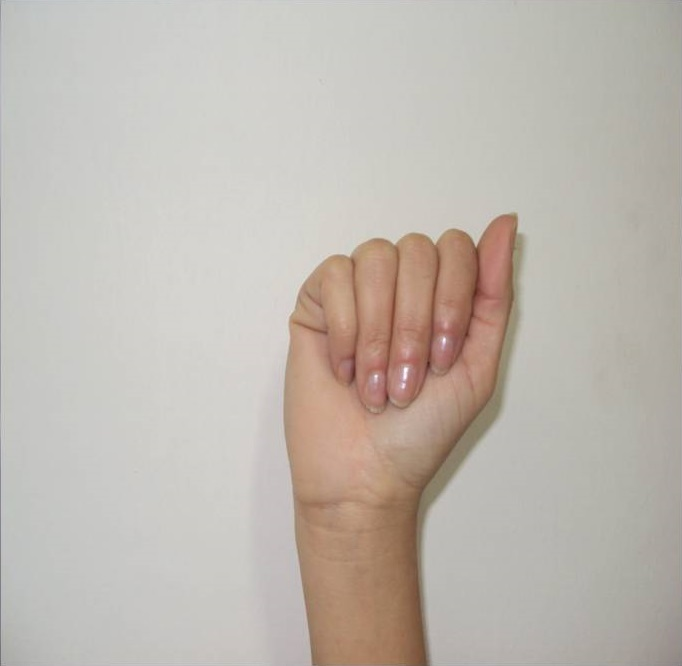

In [ ]:
image = cv2.imread(path + '/images/hand/Libras/A.JPG')
cv2_imshow(image)

In [ ]:
image.shape

(666, 682, 3)

In [ ]:
image_width = image.shape[1]
image_height = image.shape[0]

In [ ]:
image_height, image_width

(666, 682)

---
### Ler o modelo carregado

In [ ]:
modelo = cv2.dnn.readNetFromCaffe(arquivo_proto, arquivo_pesos)

---
### Definir as dimensões da imagem de entrada

In [ ]:
input_height = 256
input_width = int((input_height / image_height) * image_width)

In [ ]:
input_height, input_width

(256, 262)

---
### Converter a imagem do formato openCV para o formato blob Caffe

In [ ]:
input_blob = cv2.dnn.blobFromImage(image = image, scalefactor = 1.0 / 255, 
                                     size = (input_width, input_height), 
                                     mean = (0, 0, 0), swapRB = False, crop = False)

---
### Saída

In [ ]:
modelo.setInput(input_blob)
saida = modelo.forward()

In [ ]:
saida.shape

(1, 22, 32, 33)

---
### Mapa de confiança

In [ ]:
ponto = 0
mapa_confianca = saida[0, ponto, :, :]
mapa_confianca = cv2.resize(mapa_confianca, (image_width, image_height))

(-0.5, 681.5, 665.5, -0.5)

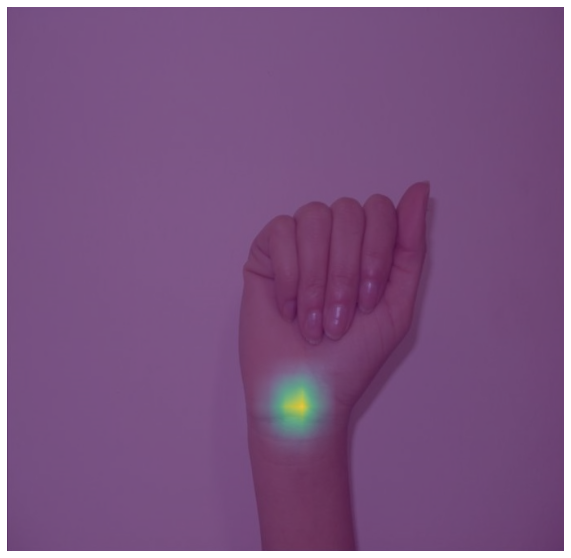

In [ ]:
plt.figure(figsize=(14, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.imshow(mapa_confianca, alpha=0.6)
plt.axis('off')

---
### Definindo o número de pontos e as ligações

In [ ]:
numero_pontos = 22
pares_pontos = [[0, 1], [1, 2], [2, 3], [3, 4], [0, 5], [5, 6], [6, 7], [7, 8],
                [0, 9], [9, 10], [10, 11], [11, 12], [0, 13], [13, 14], [14, 15],
                [15, 16], [0, 17], [17, 18], [18, 19], [19, 20]]

In [ ]:
pares_pontos

[[0, 1],
 [1, 2],
 [2, 3],
 [3, 4],
 [0, 5],
 [5, 6],
 [6, 7],
 [7, 8],
 [0, 9],
 [9, 10],
 [10, 11],
 [11, 12],
 [0, 13],
 [13, 14],
 [14, 15],
 [15, 16],
 [0, 17],
 [17, 18],
 [18, 19],
 [19, 20]]

In [ ]:
color_pointA, color_pointB, color_line = (14, 201, 255), (255, 0, 128), (192, 192, 192)
color_txtpoint = (10, 216, 245)

font_size, line_size, circle_size, espessura = 5, 1, 4, 2
font = cv2.FONT_HERSHEY_SIMPLEX

---
### Saída completa

In [ ]:
image_copy = np.copy(image)

In [ ]:
pontos = []
limite = 0.1
for i in range(numero_pontos):
    map_confiance = saida[0, i, :, :]
    map_confiance = cv2.resize(map_confiance, (image_width, image_height))

    _, confiance, _, ponto = cv2.minMaxLoc(map_confiance)

    if confiance > limite:
        cv2.circle(image_copy, (int(ponto[0]), int(ponto[1])), 5, color_pointA, 
                   thickness=espessura, lineType=cv2.FILLED)
        cv2.putText(image_copy, ' ' + (str(int(ponto[0]))) + ', ' + 
                    str(int(ponto[1])), (int(ponto[0]), int(ponto[1])), 
                    font, 0.3, color_txtpoint, 0, lineType=cv2.LINE_AA )
        
        cv2.circle(image, (int(ponto[0]), int(ponto[1])), circle_size, 
                   color_pointA, thickness=espessura, lineType=cv2.FILLED)
        cv2.putText(image, ' ' + '{}'.format(i), (int(ponto[0]), int(ponto[1])),
                    font, 0.3, color_txtpoint, 0, lineType=cv2.LINE_AA)
        
        pontos.append((int(ponto[0]), int(ponto[1])))
    else:
        pontos.append((0, 0))

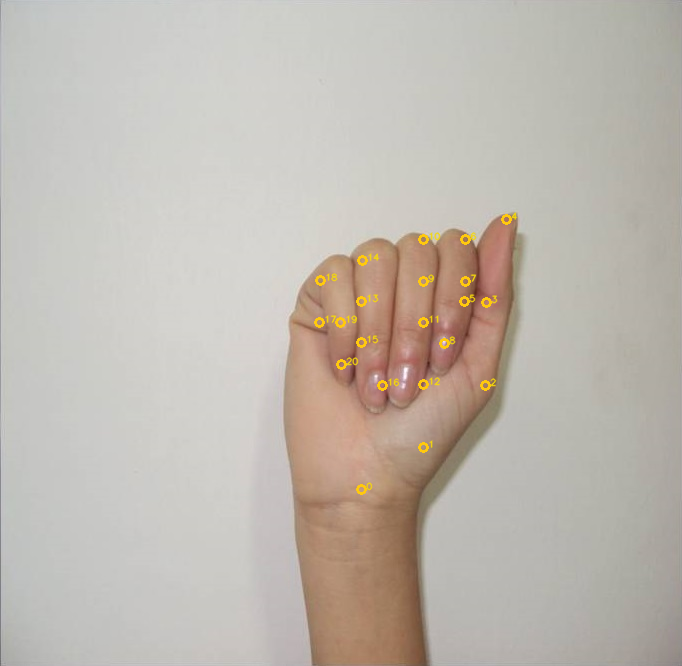

In [ ]:
cv2_imshow(image)

---
### Desenhar o esqueleto: quando temos os pontos chave, apenas juntamos os pares

In [ ]:
for par in pares_pontos:
    parteA = par[0]
    parteB = par[1]

    if pontos[parteA] != (0, 0) and pontos[parteB] != (0, 0):
        cv2.line(image_copy, pontos[parteA], pontos[parteB], color_line,
                 line_size, lineType=cv2.LINE_AA)
        cv2.line(image, pontos[parteA], pontos[parteB], color_line, line_size,
                 lineType=cv2.LINE_AA)

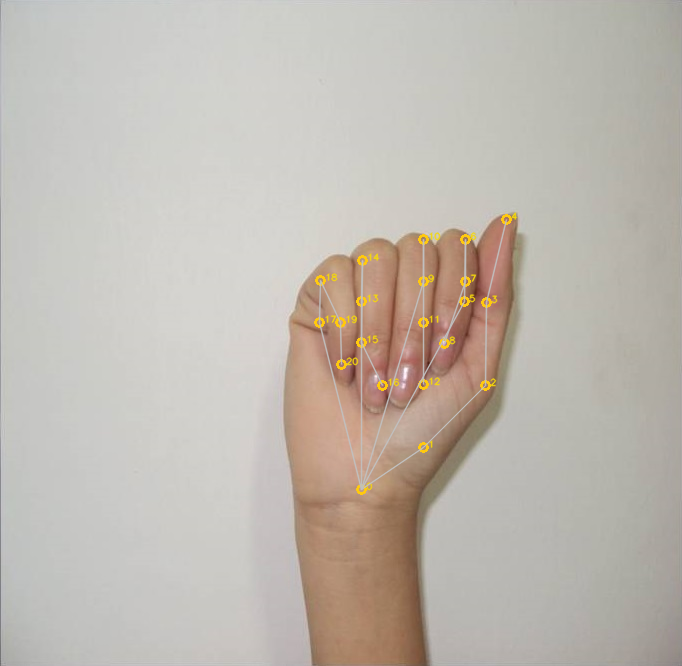

In [ ]:
cv2_imshow(image)

---
### Verificar posições dos dedos e da mão

Usar a função ```verificar_posicao_DEDOS``` para verificar se os dedos estão dobrados, esticados na vertical ou esticados na horizontal.

Parâmetros das funções:
- Passamos como parâmetro para a função, o vetor de pontos detectados, limitando as articulações de cada dedo da mão.
- A função ```verificar_altura_MAO```, verifica se a posição da mão está voltada para cima ou para baixo.

Os pontos de 1 ao 5, correspondem ao dedo polegar
- Para o dedo polegar, precisa de uma verificação adicional para saber se está esticado ou dobrado comparando a diferença dos pontos na vertical e na horizontal

Pontos do 5 ao 9, correspondem ao dedo indicador

Pontos do 9 ao 13, correspondem ao dedo médio

Pontos do 13 ao 17, correspondem ao dedo anelar

Pontos do 17 ao 21, correspondem ao dedo mínimo

---
### Importando os módulos

In [ ]:
sys.path.append(path + '/modules')

In [ ]:
import alfabeto
import extrator_ALTURA as altura
import extrator_POSICAO as posicao
import extrator_PROXIMIDADE as proximidade

In [ ]:
posicao.posicoes = []

In [ ]:
# Dedo polegar
posicao.verificar_posicao_DEDOS(pontos[1:5], 'polegar', altura.verificar_altura_MAO(pontos))
posicao.posicoes

['esticado vertical']

In [ ]:
# Dedo indicado
posicao.verificar_posicao_DEDOS(pontos[5:9], 'indicador', altura.verificar_altura_MAO(pontos))
posicao.posicoes

['esticado vertical', 'dobrado']

In [ ]:
# Dedo médio
posicao.verificar_posicao_DEDOS(pontos[9:13], 'medio', altura.verificar_altura_MAO(pontos))
posicao.posicoes

['esticado vertical', 'dobrado', 'dobrado']

In [ ]:
# Dedo anelar
posicao.verificar_posicao_DEDOS(pontos[13:17], 'anelar', altura.verificar_altura_MAO(pontos))
posicao.posicoes

['esticado vertical', 'dobrado', 'dobrado', 'dobrado']

In [ ]:
# Dedo mínimo
posicao.verificar_posicao_DEDOS(pontos[13:21], 'minimo', altura.verificar_altura_MAO(pontos))
posicao.posicoes

['esticado vertical', 'dobrado', 'dobrado', 'dobrado', 'dobrado']

---
### Verificar proximidade entre os dedos

Após verificar se os dedos estão dobrados ou esticados, verificamos a proximidade entre os dedos com a função ```verificar_proximidade_DEDOS```

Esta função faz a verificação da proximidade entre os dedos, comparando se os dedos estão lado a lado e se estão na mesma posição (esticados ou dobrados)

Se forem iguais, então significa que estão próximos
- Recebe como parâmetro todo o vetor de pontos
- O resultado será o vetor de características de todos os dedos da mão

In [ ]:
p = proximidade.verificar_proximidade_DEDOS(pontos)
p

['polegar esticado vertical: afastado do indicador',
 'indicador dobrado: proximo ao medio',
 'medio dobrado: proximo ao anelar',
 'anelar dobrado: proximo ao minimo',
 'minimo dobrado: proximo ao anelar']

---
### Comparando as características

In [ ]:
letras = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'L', 'M',
          'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W']

In [ ]:
for i, a in enumerate(alfabeto.letras):
    if proximidade.verificar_proximidade_DEDOS(pontos) == alfabeto.letras[i]:
        cv2.putText(image, ' ' + letras[i], (50, 150), font, font_size, (255, 0, 0), espessura, lineType=cv2.LINE_AA )

---
### Exibindo as saídas

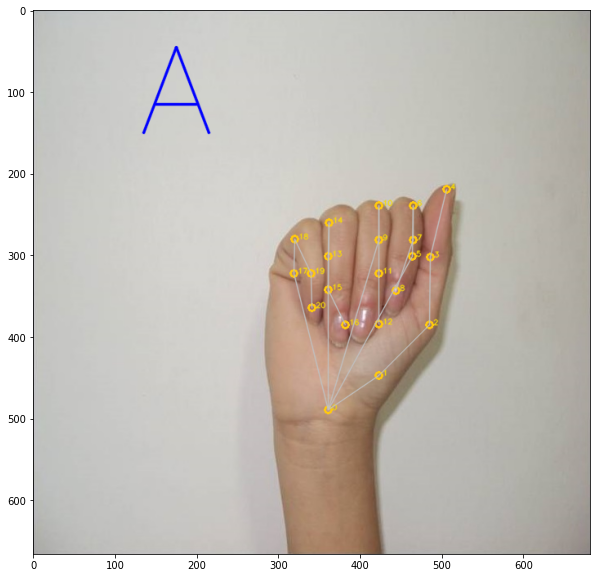

In [ ]:
plt.figure(figsize=(14, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

---
### Exibindo as saídas

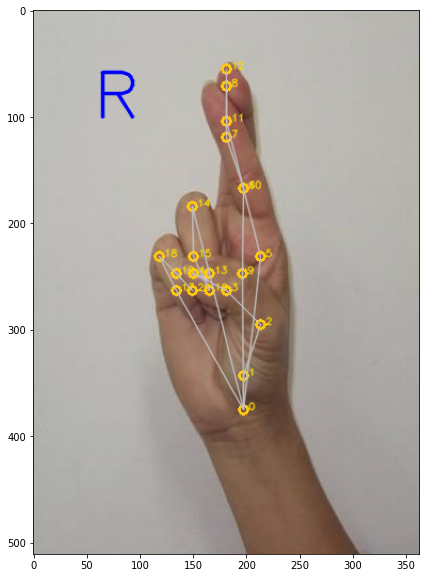

In [ ]:
image = cv2.imread(path + '/images/hand/Libras/R.JPG')

image_width = image.shape[1]
image_height = image.shape[0]

modelo = cv2.dnn.readNetFromCaffe(arquivo_proto, arquivo_pesos)

input_height = 256
input_width = int((input_height / image_height) * image_width)

input_blob = cv2.dnn.blobFromImage(image = image, scalefactor = 1.0 / 255, 
                                     size = (input_width, input_height), 
                                     mean = (0, 0, 0), swapRB = False, crop = False)

modelo.setInput(input_blob)
saida = modelo.forward()

pontos = []
limite = 0.1
for i in range(numero_pontos):
    map_confiance = saida[0, i, :, :]
    map_confiance = cv2.resize(map_confiance, (image_width, image_height))

    _, confiance, _, ponto = cv2.minMaxLoc(map_confiance)

    if confiance > limite:
        cv2.circle(image_copy, (int(ponto[0]), int(ponto[1])), 5, color_pointA, 
                   thickness=espessura, lineType=cv2.FILLED)
        cv2.putText(image_copy, ' ' + (str(int(ponto[0]))) + ', ' + 
                    str(int(ponto[1])), (int(ponto[0]), int(ponto[1])), 
                    font, 0.3, color_txtpoint, 0, lineType=cv2.LINE_AA )
        
        cv2.circle(image, (int(ponto[0]), int(ponto[1])), circle_size, 
                   color_pointA, thickness=espessura, lineType=cv2.FILLED)
        cv2.putText(image, ' ' + '{}'.format(i), (int(ponto[0]), int(ponto[1])),
                    font, 0.3, color_txtpoint, 0, lineType=cv2.LINE_AA)
        
        pontos.append((int(ponto[0]), int(ponto[1])))
    else:
        pontos.append((0, 0))

for par in pares_pontos:
    parteA = par[0]
    parteB = par[1]

    if pontos[parteA] != (0, 0) and pontos[parteB] != (0, 0):
        cv2.line(image_copy, pontos[parteA], pontos[parteB], color_line,
                 line_size, lineType=cv2.LINE_AA)
        cv2.line(image, pontos[parteA], pontos[parteB], color_line, line_size,
                 lineType=cv2.LINE_AA)
        
posicao.posicoes = []

# Dedo polegar
posicao.verificar_posicao_DEDOS(pontos[1:5], 'polegar', altura.verificar_altura_MAO(pontos))

# Dedo indicado
posicao.verificar_posicao_DEDOS(pontos[5:9], 'indicador', altura.verificar_altura_MAO(pontos))

# Dedo médio
posicao.verificar_posicao_DEDOS(pontos[9:13], 'medio', altura.verificar_altura_MAO(pontos))

# Dedo anelar
posicao.verificar_posicao_DEDOS(pontos[13:17], 'anelar', altura.verificar_altura_MAO(pontos))

# Dedo mínimo
posicao.verificar_posicao_DEDOS(pontos[13:21], 'minimo', altura.verificar_altura_MAO(pontos))

for i, a in enumerate(alfabeto.letras):
    if proximidade.verificar_proximidade_DEDOS(pontos) == alfabeto.letras[i]:
        cv2.putText(image, ' ' + letras[i], (25, 100), font, 2, (255, 0, 0), espessura, lineType=cv2.LINE_AA )

plt.figure(figsize=(14, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))